In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("/content/heart_20000.csv")
print(df)



       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0       67    0   2       179   290    0        1      128      0      0.7   
1       57    0   2       134   194    0        0      196      1      3.4   
2       43    0   2       155   323    1        0      159      0      0.8   
3       71    1   3       124   271    0        0       95      1      3.5   
4       36    1   3       153   172    0        1      164      0      4.0   
...    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
19995   45    0   1       174   183    1        2      187      1      5.8   
19996   51    1   1       174   167    0        1      103      0      0.4   
19997   30    0   2       177   246    1        0      169      1      4.7   
19998   34    1   3       138   342    0        1      147      0      0.4   
19999   57    1   2       148   261    1        0      157      1      4.1   

       slope  ca  thal  target  
0          1   1     2       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       20000 non-null  int64  
 1   sex       20000 non-null  int64  
 2   cp        20000 non-null  int64  
 3   trestbps  20000 non-null  int64  
 4   chol      20000 non-null  int64  
 5   fbs       20000 non-null  int64  
 6   restecg   20000 non-null  int64  
 7   thalach   20000 non-null  int64  
 8   exang     20000 non-null  int64  
 9   oldpeak   20000 non-null  float64
 10  slope     20000 non-null  int64  
 11  ca        20000 non-null  int64  
 12  thal      20000 non-null  int64  
 13  target    20000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.1 MB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,52.424750,0.49850,1.505000,134.240300,249.388750,0.497800,0.993200,144.294350,0.496250,2.990480,0.995650,1.495650,1.997650,0.495850
std,13.794968,0.50001,1.113255,26.170879,57.636985,0.500008,0.815774,31.591494,0.499998,1.735139,0.813858,1.115232,0.810911,0.499995
min,29.000000,0.00000,0.000000,90.000000,150.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,41.000000,0.00000,1.000000,111.000000,200.000000,0.000000,0.000000,117.000000,0.000000,1.500000,0.000000,1.000000,1.000000,0.000000
50%,52.000000,0.00000,2.000000,134.000000,249.000000,0.000000,1.000000,144.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000
75%,64.000000,1.00000,2.000000,157.000000,299.250000,1.000000,2.000000,171.000000,1.000000,4.500000,2.000000,2.000000,3.000000,1.000000
max,76.000000,1.00000,3.000000,179.000000,349.000000,1.000000,2.000000,199.000000,1.000000,6.000000,2.000000,3.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.fillna(df.mean(), inplace=True)

Age Distribution


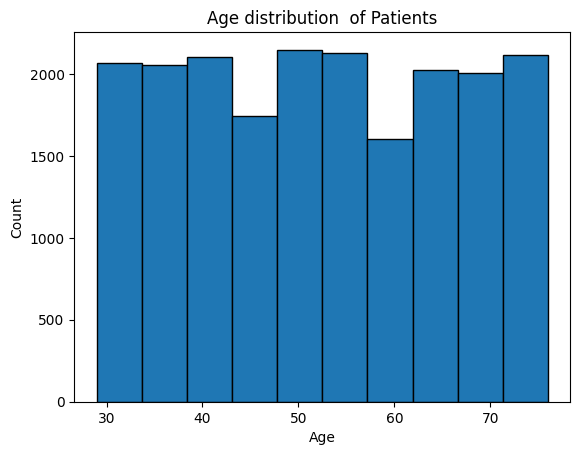

In [7]:
plt.hist(df["age"], edgecolor="black")
plt.title("Age distribution  of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Male VS Female Count


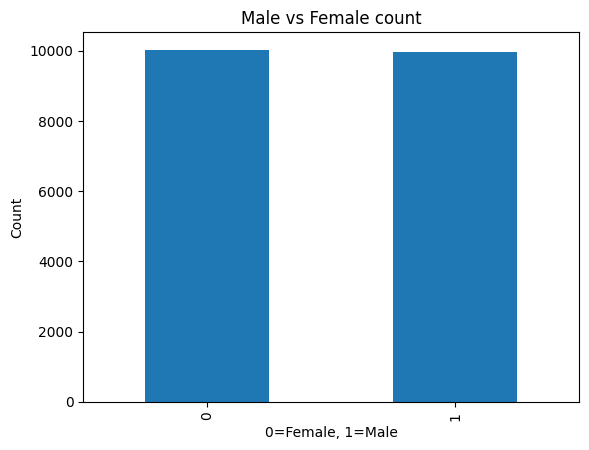

In [8]:
df["sex"].value_counts().plot(kind='bar')
plt.title("Male vs Female count")
plt.xlabel("0=Female, 1=Male")
plt.ylabel("Count")
plt.show()

Heart Disease Count

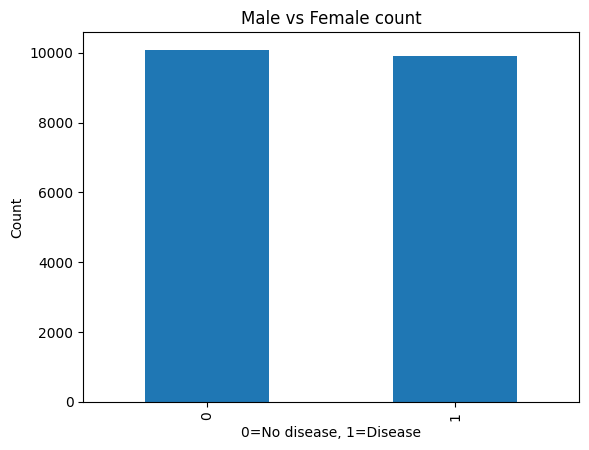

In [9]:
df["target"].value_counts().plot(kind='bar')
plt.title("Male vs Female count")
plt.xlabel("0=No disease, 1=Disease")
plt.ylabel("Count")
plt.show()

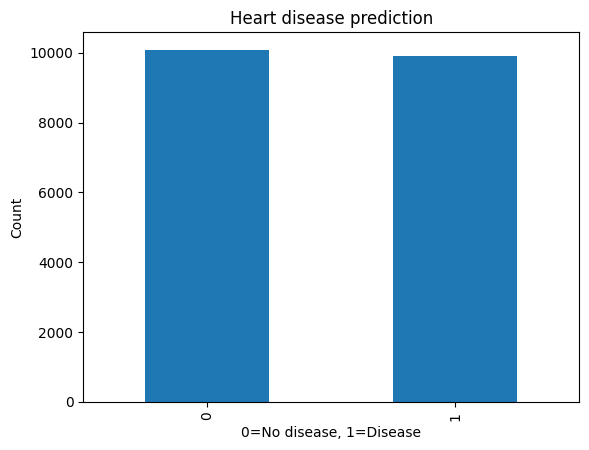

In [10]:
df["target"].value_counts().plot(kind='bar')
plt.title("Heart disease prediction")
plt.xlabel("0=No disease, 1=Disease")
plt.ylabel("Count")
plt.show()

Cholesterol VS Heart Disease


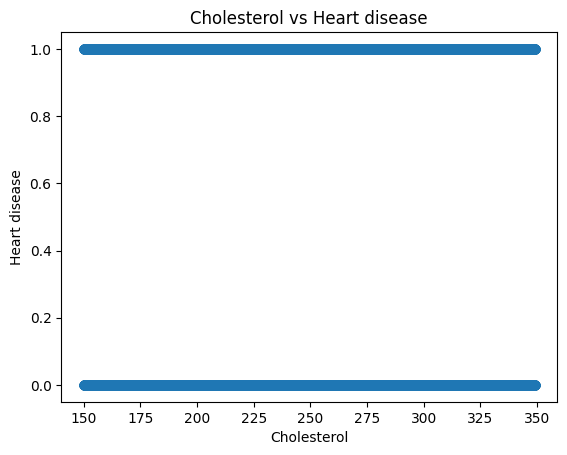

In [11]:
plt.scatter(df["chol"],df["target"])
plt.title("Cholesterol vs Heart disease")
plt.xlabel("Cholesterol")
plt.ylabel("Heart disease")
plt.show()

Preparing Data For ML

In [12]:
X=df.drop('target', axis=1)
y=df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)


Train Machine Learning Model


In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


accuracy:  0.644
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2015
           1       0.64      0.63      0.64      1985

    accuracy                           0.64      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.64      0.64      0.64      4000

